In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy.table import Table
import numpy.ma as ma

In [2]:
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['savefig.dpi'] = 300

In [3]:
master_table_fn = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/output_files/DR17/CURRENT_MASTER_TABLE/Elliptical_StelVelDisp._Mvir.fits'
master_table = Table.read(master_table_fn, format='fits')

In [4]:
ell_mvir = master_table[master_table['Mvir'] > 0]

In [5]:
Mvir = ell_mvir['Mvir']
Mstar = np.log10(ell_mvir['nsa_sersic_mass'])
bins=np.histogram(np.hstack((Mvir,Mstar)), bins=10)[1]

In [3]:
plot_dir = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/Ellipticals_Images/results_plots/'

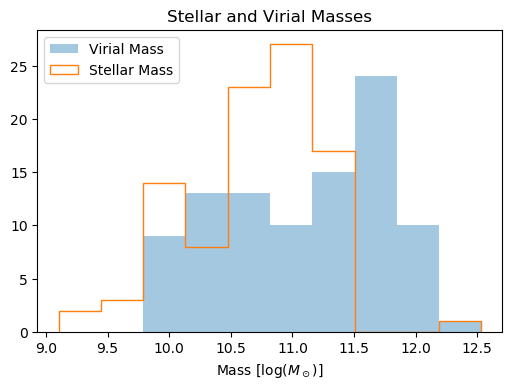

In [87]:
plt.hist(Mvir, label='Virial Mass', histtype='stepfilled', alpha=0.4, bins=bins)
plt.hist(Mstar, label='Stellar Mass', histtype='step', bins=bins)
plt.xlabel('Mass [$\log(M_\odot)$]')
plt.legend(loc='upper left')
plt.title('Stellar and Virial Masses')
plt.savefig(plot_dir + 'mass_distributions.png')
plt.show()

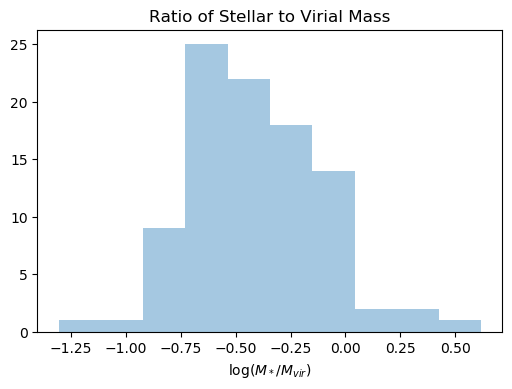

In [8]:
plt.hist(Mstar - Mvir, histtype='stepfilled', alpha=0.4)
plt.xlabel('log($M_*/M_{vir}$)')
plt.title('Ratio of Stellar to Virial Mass')
plt.savefig(plot_dir + 'mass_ratios.png')
plt.show()

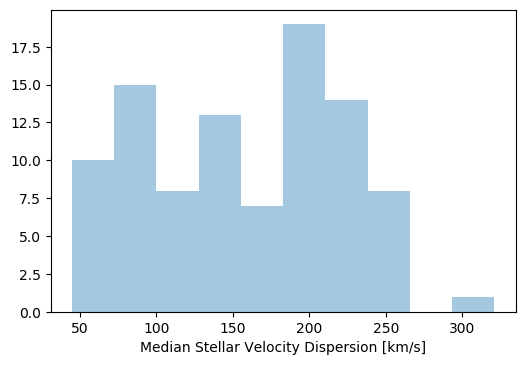

In [9]:
plt.hist(ell_mvir['star_sigma'], histtype='stepfilled', alpha=0.4, bins=10)
plt.xlabel('Median Stellar Velocity Dispersion [km/s]')
plt.savefig(plot_dir + 'median_sigma.png')
plt.show()

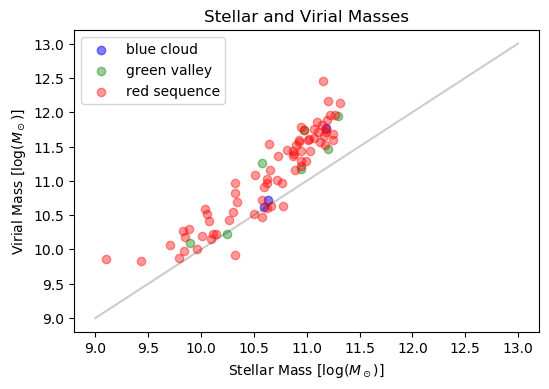

In [86]:
plt.scatter(Mstar[cmd == 1], Mvir[cmd == 1], color = 'b', alpha=0.5, label='blue cloud')
plt.scatter(Mstar[cmd == 2], Mvir[cmd == 2], alpha=0.4, color = 'g', label='green valley')
plt.scatter(Mstar[cmd == 3], Mvir[cmd == 3], alpha=0.4, color = 'r', label='red sequence')
plt.legend()
plt.ylabel('Virial Mass [$\log (M_\odot)$]')
plt.xlabel('Stellar Mass [$\log (M_\odot)$]')
plt.plot([9,13],[9,13],color='k',alpha=0.2)
plt.title('Stellar and Virial Masses')
plt.savefig(plot_dir + 'mass_scatter.png')
plt.show()

In [43]:
r_band = np.zeros(len(ell_mvir))
for i in range(len(ell_mvir)):
    r_band[i] = ell_mvir['nsa_elpetro_absmag'][i][4]

In [45]:
cmd = ell_mvir['CMD_class']

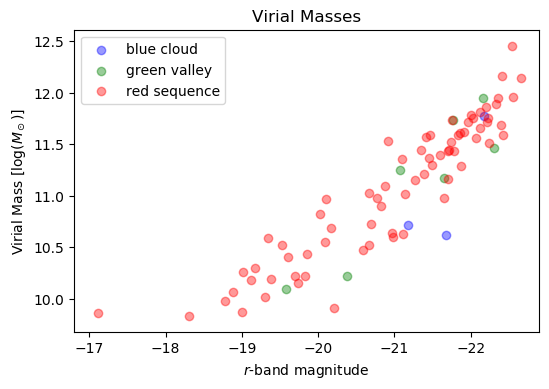

In [85]:
plt.scatter(r_band[cmd == 1], Mvir[cmd == 1], color='b', alpha=0.4, label='blue cloud')
plt.scatter(r_band[cmd == 2], Mvir[cmd == 2], color='g', alpha=0.4, label='green valley')
plt.scatter(r_band[cmd == 3], Mvir[cmd == 3], color='r', alpha=0.4, label='red sequence')
plt.legend()
plt.xlabel('$r$-band magnitude')
plt.ylabel('Virial Mass [$\log(M_\odot)$]')
plt.title('Virial Masses')
plt.xlim(-16.8,-22.9)
plt.savefig(plot_dir + 'mag_mvir.png')

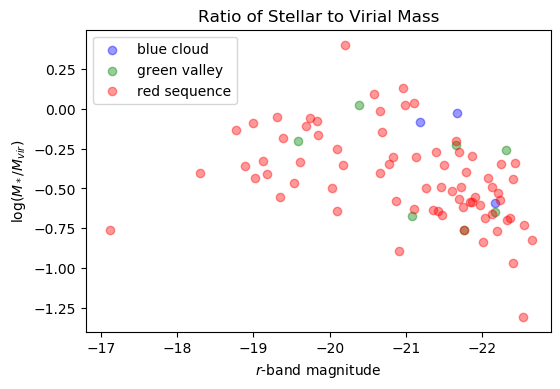

In [84]:
plt.scatter(r_band[cmd == 1], Mstar[cmd == 1] - Mvir[cmd == 1], alpha=0.4, color='b', label='blue cloud')
plt.scatter(r_band[cmd == 2], Mstar[cmd == 2] - Mvir[cmd == 2], alpha=0.4, color='g', label='green valley')
plt.scatter(r_band[cmd == 3], Mstar[cmd == 3] - Mvir[cmd == 3], alpha=0.4, color='r', label='red sequence')
plt.legend()
plt.xlim(-16.8,-22.9)
plt.xlabel('$r$-band magnitude')
plt.title('Ratio of Stellar to Virial Mass')
plt.ylabel('$\log(M_*/M_{vir})$')
plt.savefig(plot_dir + 'mag_mratio.png')

In [5]:
import sys
sys.path.insert(1, '/Users/nityaravi/Documents/GitHub/RotationCurves/ellipticals/')
from IO_data import extract_data

In [5]:
test_gal='8134-3702'
maps = extract_data('/Users/nityaravi/Documents/Research/RotationCurves/data/manga/DR17/',
                   test_gal, ['star_sigma'])

Text(0, 0.5, 'spaxel')

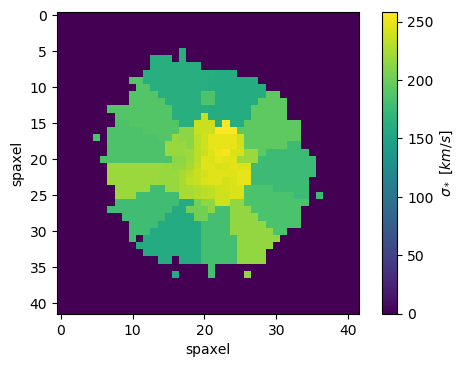

In [6]:
plt.imshow(maps['star_sigma'])
plt.colorbar(label='$\sigma_*\ [km/s]$')
plt.xlabel('spaxel')
plt.ylabel('spaxel')

Text(0, 0.5, 'spaxel')

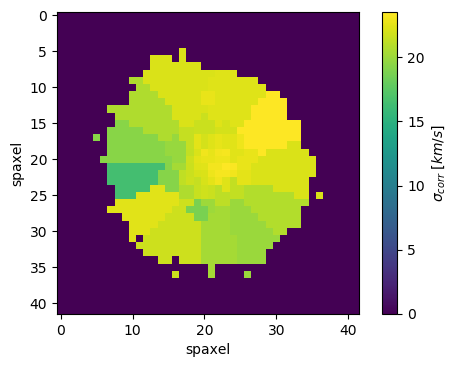

In [7]:
plt.imshow(maps['star_sigma_corr'])
plt.colorbar(label='$\sigma_{corr}\ [km/s]$')
plt.xlabel('spaxel')
plt.ylabel('spaxel')

In [8]:
master_table[np.logical_and(master_table['CMD_class'] == 1.0, master_table['Mvir'] > 0)]

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7],smoothness_score,nsa_elpetro_th90,v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,v_max,v_max_err,r_turn,r_turn_err,chi2,alpha,alpha_err,Rmax,M,M_err,fit_flag,Sigma_disk,Sigma_disk_err,R_disk,R_disk_err,rho_bulge,rho_bulge_err,R_bulge,R_bulge_err,M90_disk,M90_disk_err,M_disk,M_disk_err,chi2_disk,logHI,logHIlim,WF50,WF50_err,DL_ttype,vis_tidal,b,b_err,M_R90,M_R90_err,fit_function,A_g,A_r,logH2,R90_kpc,v_3p5,v_3p5_err,NSA_plate,NSA_fiberID,NSA_MJD,logH2_CG,logH2_CG_err,logH2_M,Z,Z_err,M_Z,M_Z_err,grad_Z,grad_Z_err,Z_0,Z_0_err,SFR,sSFR,SFR_err,sSFR_err,Flux_OII_3726,Flux_OII_3726_Err,Flux_OII_3728,Flux_OII_3728_Err,Flux_OIII_4958,Flux_OIII_4958_Err,Flux_OIII_5006,Flux_OIII_5006_Err,Flux_NII_6547,Flux_NII_6547_Err,Flux_NII_6583,Flux_NII_6583_Err,Flux_Ha_6562,Flux_Ha_6562_Err,Flux_Hb_4861,Flux_Hb_4861_Err,CMD_class,rabsmag_NSA,param_H2,param_H2_err,Z_map,Z_err_map,M_Z_map,M_Z_err_map,logHI_R90,Mvir,Mvir_err,star_sigma,star_sigma_err
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
11826,6104,11826-6104,1-407465,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,190.000752018,36.8724047121,136.162373459,79.9604513808,190.00075,36.872405,0.0118393,15,13500.9,0,27.2491,68.9032,ma103-ma164,30,5-6,12028,189.5542,37.42149,1.03026,1.09533,1.18663,1.21791,1.48886,1.60222,0.74091,0.872655,0.891354,58640,58643,58655,2.48274,2.44653,2.4276,2.40908,2080,0,0,1,plateTargets-1.par,6466,J124000.17+365220.6,61,61,0,0.065172374,0.0279307,0.04120073,0.

In [9]:
MAP_FOLDER = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/DR17/'
maps1 = extract_data(MAP_FOLDER, '11826-6104', ['Ha'])

maps2 = extract_data(MAP_FOLDER, '8093-9101', ['Ha'])

maps3 = extract_data(MAP_FOLDER, '9887-1901', ['Ha'])

Text(0.5, 1.0, '11826-6104')

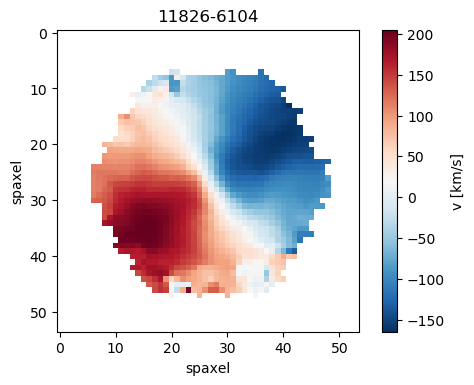

In [24]:
plt.imshow(ma.array(maps1['Ha_vel'], mask=maps1['Ha_vel_mask']), cmap='RdBu_r')
plt.colorbar(label='v [km/s]')
plt.xlabel('spaxel')
plt.ylabel('spaxel')
plt.title('11826-6104')

Text(0.5, 1.0, '8093-9101')

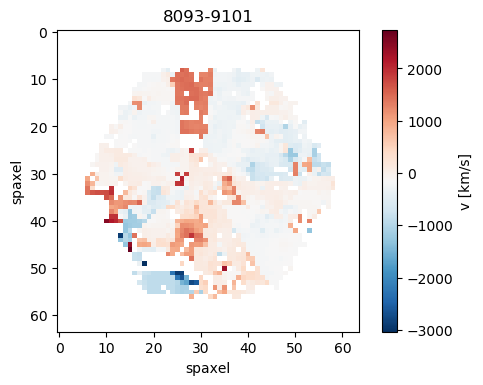

In [25]:
plt.imshow(ma.array(maps2['Ha_vel'], mask=maps2['Ha_vel_mask']), cmap='RdBu_r')
plt.colorbar(label='v [km/s]')
plt.xlabel('spaxel')
plt.ylabel('spaxel')
plt.title('8093-9101')

Text(0.5, 1.0, '9887-1901')

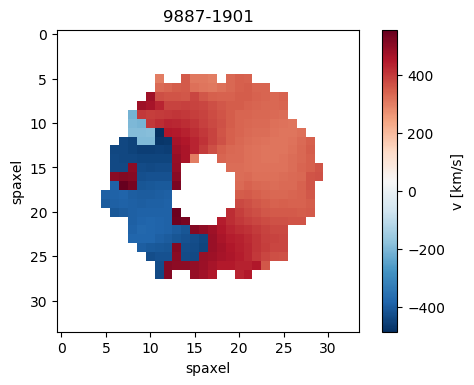

In [26]:
plt.imshow(ma.array(maps3['Ha_vel'], mask=maps3['Ha_vel_mask']), cmap='RdBu_r')
plt.colorbar(label='v [km/s]')
plt.xlabel('spaxel')
plt.ylabel('spaxel')
plt.title('9887-1901')

In [4]:
plot_dir = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/Ellipticals_Images/results_plots/'
master_table_fn = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/output_files/DR17/CURRENT_MASTER_TABLE/Elliptical_StelVelDispDAPMedSigma_Mvir_smoothness_lt_2.fits'
master_table = Table.read(master_table_fn, format='fits')

In [5]:
ell_mvir = master_table[master_table['Mvir']>0]
Mvir = ell_mvir['Mvir']
Mstar = np.log10(ell_mvir['nsa_sersic_mass'])
cmd = ell_mvir['CMD_class']
r_band = np.zeros(len(ell_mvir))
for i in range(len(ell_mvir)):
    r_band[i] = ell_mvir['nsa_elpetro_absmag'][i][4]

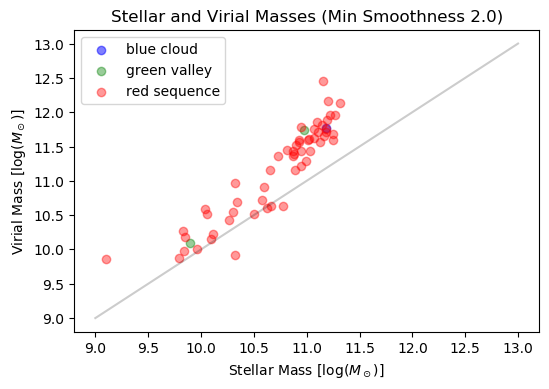

In [18]:
plt.scatter(Mstar[cmd == 1], Mvir[cmd == 1], color = 'b', alpha=0.5, label='blue cloud')
plt.scatter(Mstar[cmd == 2], Mvir[cmd == 2], alpha=0.4, color = 'g', label='green valley')
plt.scatter(Mstar[cmd == 3], Mvir[cmd == 3], alpha=0.4, color = 'r', label='red sequence')
plt.legend()
plt.ylabel('Virial Mass [$\log (M_\odot)$]')
plt.xlabel('Stellar Mass [$\log (M_\odot)$]')
plt.plot([9,13],[9,13],color='k',alpha=0.2)
plt.title('Stellar and Virial Masses (Min Smoothness 2.0)')
plt.savefig(plot_dir + 'mass_scatter_smoothness_lt_2.png')
plt.show()

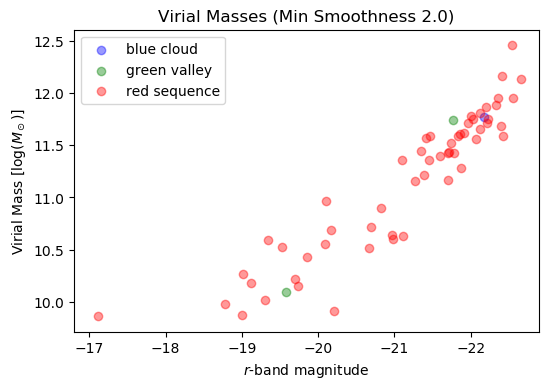

In [19]:
plt.scatter(r_band[cmd == 1], Mvir[cmd == 1], color='b', alpha=0.4, label='blue cloud')
plt.scatter(r_band[cmd == 2], Mvir[cmd == 2], color='g', alpha=0.4, label='green valley')
plt.scatter(r_band[cmd == 3], Mvir[cmd == 3], color='r', alpha=0.4, label='red sequence')
plt.legend()
plt.xlabel('$r$-band magnitude')
plt.ylabel('Virial Mass [$\log(M_\odot)$]')
plt.title('Virial Masses (Min Smoothness 2.0)')
plt.xlim(-16.8,-22.9)
plt.savefig(plot_dir + 'mag_mvir_smoothness_lt_2.png')

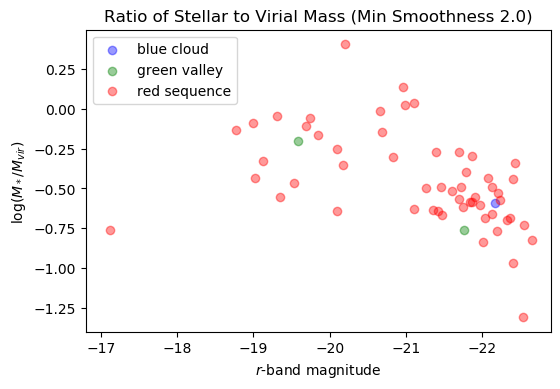

In [20]:
plt.scatter(r_band[cmd == 1], Mstar[cmd == 1] - Mvir[cmd == 1], alpha=0.4, color='b', label='blue cloud')
plt.scatter(r_band[cmd == 2], Mstar[cmd == 2] - Mvir[cmd == 2], alpha=0.4, color='g', label='green valley')
plt.scatter(r_band[cmd == 3], Mstar[cmd == 3] - Mvir[cmd == 3], alpha=0.4, color='r', label='red sequence')
plt.legend()
plt.xlim(-16.8,-22.9)
plt.xlabel('$r$-band magnitude')
plt.title('Ratio of Stellar to Virial Mass (Min Smoothness 2.0)')
plt.ylabel('$\log(M_*/M_{vir})$ ')
plt.savefig(plot_dir + 'mag_mratio_smoothness_lt_2.png')

(array([ 9., 10., 16., 14., 13.,  2.,  1.,  1.,  0.,  1.]),
 array([2.00970053, 2.19630439, 2.38290824, 2.5695121 , 2.75611595,
        2.94271981, 3.12932366, 3.31592752, 3.50253137, 3.68913523,
        3.87573908]),
 <a list of 10 Patch objects>)

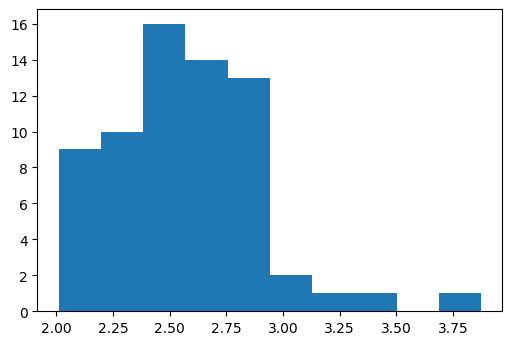

In [22]:
smoothness_scores = ell_mvir['smoothness_score']
plt.hist(smoothness_scores)

In [24]:
ell_mvir[ell_mvir['plateifu'] == '8262-6102']

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7],smoothness_score,nsa_elpetro_th90,v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,v_max,v_max_err,r_turn,r_turn_err,chi2,alpha,alpha_err,Rmax,M,M_err,fit_flag,Sigma_disk,Sigma_disk_err,R_disk,R_disk_err,rho_bulge,rho_bulge_err,R_bulge,R_bulge_err,M90_disk,M90_disk_err,M_disk,M_disk_err,chi2_disk,logHI,logHIlim,WF50,WF50_err,DL_ttype,vis_tidal,b,b_err,M_R90,M_R90_err,fit_function,A_g,A_r,logH2,R90_kpc,v_3p5,v_3p5_err,NSA_plate,NSA_fiberID,NSA_MJD,logH2_CG,logH2_CG_err,logH2_M,Z,Z_err,M_Z,M_Z_err,grad_Z,grad_Z_err,Z_0,Z_0_err,SFR,sSFR,SFR_err,sSFR_err,Flux_OII_3726,Flux_OII_3726_Err,Flux_OII_3728,Flux_OII_3728_Err,Flux_OIII_4958,Flux_OIII_4958_Err,Flux_OIII_5006,Flux_OIII_5006_Err,Flux_NII_6547,Flux_NII_6547_Err,Flux_NII_6583,Flux_NII_6583_Err,Flux_Ha_6562,Flux_Ha_6562_Err,Flux_Hb_4861,Flux_Hb_4861_Err,CMD_class,rabsmag_NSA,param_H2,param_H2_err,Z_map,Z_err_map,M_Z_map,M_Z_err_map,logHI_R90,Mvir,Mvir_err,star_sigma,star_sigma_err
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
8262,6102,8262-6102,1-282527,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,185.570458171,43.7363524528,140.560506114,72.3802177308,185.57046,43.736352,0.0124772,9,8100.81,0,26.4768,43.403,ma038-ma096,24,1-4,8810,184.91954,44.233536,1.01885,1.03031,1.05501,1.4597,1.59482,1.65062,0.886239,0.949627,0.962654,57405,57434,57434,2.64922,2.61422,2.58602,2.5615,2080,0,0,1,plateTargets-1.par,7055,J122216.91+434410.8,61,61,0,0.0480502,0.0237304,0.0310012,0.046577

In [13]:
spirals = master_table[master_table['M_R90'] > 0]
s_r_band = np.zeros(len(spirals))
s_cmd = spirals['CMD_class']
for i in range(len(spirals)):
    s_r_band[i] = spirals['nsa_elpetro_absmag'][i][4]
    
MR90 = spirals['M_R90']

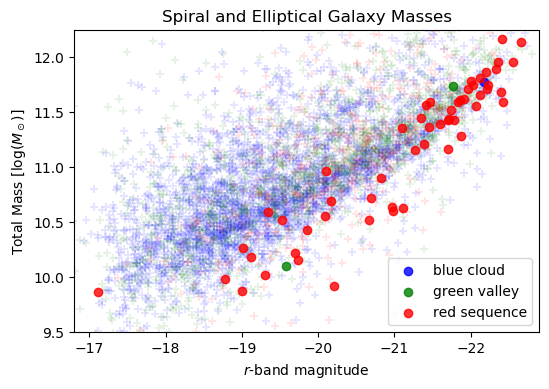

In [23]:
plt.scatter(s_r_band[s_cmd == 1], MR90[s_cmd == 1], color='b', alpha=0.1, marker='+')
plt.scatter(s_r_band[s_cmd == 2], MR90[s_cmd == 2], color='g', alpha=0.1,marker='+')
plt.scatter(s_r_band[s_cmd == 3], MR90[s_cmd == 3], color='r', alpha=0.1,marker='+')
plt.scatter(r_band[cmd == 1], Mvir[cmd == 1], color='b', alpha=0.8, label='blue cloud')
plt.scatter(r_band[cmd == 2], Mvir[cmd == 2], color='g', alpha=0.8, label='green valley')
plt.scatter(r_band[cmd == 3], Mvir[cmd == 3], color='r', alpha=0.8, label='red sequence')

plt.legend()
plt.xlabel('$r$-band magnitude')
plt.ylabel('Total Mass [$\log(M_\odot)$]')
plt.title('Spiral and Elliptical Galaxy Masses')
plt.xlim(-16.8,-22.9)
plt.ylim(9.5,12.25)
plt.savefig(plot_dir + 'mag_totmass_allmorph.png')

In [5]:
HI = master_table[np.logical_and(master_table['DL_ttype']<0, master_table['logHI']>0)]

In [6]:
HI_lim = master_table[np.logical_and(master_table['DL_ttype']<0, master_table['logHIlim']>0)]

In [7]:
HI

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7],smoothness_score,nsa_elpetro_th90,v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,v_max,v_max_err,r_turn,r_turn_err,chi2,alpha,alpha_err,Rmax,M,M_err,fit_flag,Sigma_disk,Sigma_disk_err,R_disk,R_disk_err,rho_bulge,rho_bulge_err,R_bulge,R_bulge_err,M90_disk,M90_disk_err,M_disk,M_disk_err,chi2_disk,logHI,logHIlim,WF50,WF50_err,DL_ttype,vis_tidal,b,b_err,M_R90,M_R90_err,fit_function,A_g,A_r,logH2,R90_kpc,v_3p5,v_3p5_err,NSA_plate,NSA_fiberID,NSA_MJD,logH2_CG,logH2_CG_err,logH2_M,Z,Z_err,M_Z,M_Z_err,grad_Z,grad_Z_err,Z_0,Z_0_err,SFR,sSFR,SFR_err,sSFR_err,Flux_OII_3726,Flux_OII_3726_Err,Flux_OII_3728,Flux_OII_3728_Err,Flux_OIII_4958,Flux_OIII_4958_Err,Flux_OIII_5006,Flux_OIII_5006_Err,Flux_NII_6547,Flux_NII_6547_Err,Flux_NII_6583,Flux_NII_6583_Err,Flux_Ha_6562,Flux_Ha_6562_Err,Flux_Hb_4861,Flux_Hb_4861_Err,CMD_class,rabsmag_NSA,param_H2,param_H2_err,Z_map,Z_err_map,M_Z_map,M_Z_err_map,logHI_R90,Mvir,Mvir_err,star_sigma,star_sigma_err
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10001,3704,10001-3704,1-48223,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,134.910466734,56.8788941639,159.996005375,39.7889817858,134.91047,56.878894,0.0224551,9,8100.81,0,19.9086,40.7596,ma063,37,3,9114,134.41357,57.604214,1.09903,1.14089,1.19864,1.78219,1.85994,2.12685,0.898721,0.929654,0.937466,57372,57373,57373,2.76625,2.65928,2.59165,2.54423,1168,0,0,1,plateTargets-1.par,6013,J085938.50+565244.0,37,37,0,0.0307813,0.0243213,0.0319654,0.0480427,0.

In [8]:
HI_lim

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7],smoothness_score,nsa_elpetro_th90,v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,v_max,v_max_err,r_turn,r_turn_err,chi2,alpha,alpha_err,Rmax,M,M_err,fit_flag,Sigma_disk,Sigma_disk_err,R_disk,R_disk_err,rho_bulge,rho_bulge_err,R_bulge,R_bulge_err,M90_disk,M90_disk_err,M_disk,M_disk_err,chi2_disk,logHI,logHIlim,WF50,WF50_err,DL_ttype,vis_tidal,b,b_err,M_R90,M_R90_err,fit_function,A_g,A_r,logH2,R90_kpc,v_3p5,v_3p5_err,NSA_plate,NSA_fiberID,NSA_MJD,logH2_CG,logH2_CG_err,logH2_M,Z,Z_err,M_Z,M_Z_err,grad_Z,grad_Z_err,Z_0,Z_0_err,SFR,sSFR,SFR_err,sSFR_err,Flux_OII_3726,Flux_OII_3726_Err,Flux_OII_3728,Flux_OII_3728_Err,Flux_OIII_4958,Flux_OIII_4958_Err,Flux_OIII_5006,Flux_OIII_5006_Err,Flux_NII_6547,Flux_NII_6547_Err,Flux_NII_6583,Flux_NII_6583_Err,Flux_Ha_6562,Flux_Ha_6562_Err,Flux_Hb_4861,Flux_Hb_4861_Err,CMD_class,rabsmag_NSA,param_H2,param_H2_err,Z_map,Z_err_map,M_Z_map,M_Z_err_map,logHI_R90,Mvir,Mvir_err,star_sigma,star_sigma_err
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10001,3701,10001-3701,1-48111,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,132.465646765,57.1437279024,159.95692306,38.4321715029,132.46565,57.143728,0.0687194,9,8100.81,0,20.0835,41.292,ma062,23,3,9114,134.41357,57.604214,1.10448,1.15353,1.21697,1.78219,1.85994,2.12685,0.898721,0.929654,0.937466,57372,57373,57373,2.78588,2.68683,2.63285,2.60127,2080,0,0,1,plateTargets-1.par,6013,J084951.74+570837.4,37,19,37,0.0394191,0.0189832,0.0262126,0.0381547,0.0

In [11]:
H2_CG = master_table[np.logical_and(master_table['DL_ttype'] < 0, master_table['logH2_CG'] > 0)]

In [12]:
H2_M = master_table[np.logical_and(master_table['DL_ttype'] < 0, master_table['logH2_M'] > 0)]

In [13]:
H2_CG

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7],smoothness_score,nsa_elpetro_th90,v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,v_max,v_max_err,r_turn,r_turn_err,chi2,alpha,alpha_err,Rmax,M,M_err,fit_flag,Sigma_disk,Sigma_disk_err,R_disk,R_disk_err,rho_bulge,rho_bulge_err,R_bulge,R_bulge_err,M90_disk,M90_disk_err,M_disk,M_disk_err,chi2_disk,logHI,logHIlim,WF50,WF50_err,DL_ttype,vis_tidal,b,b_err,M_R90,M_R90_err,fit_function,A_g,A_r,logH2,R90_kpc,v_3p5,v_3p5_err,NSA_plate,NSA_fiberID,NSA_MJD,logH2_CG,logH2_CG_err,logH2_M,Z,Z_err,M_Z,M_Z_err,grad_Z,grad_Z_err,Z_0,Z_0_err,SFR,sSFR,SFR_err,sSFR_err,Flux_OII_3726,Flux_OII_3726_Err,Flux_OII_3728,Flux_OII_3728_Err,Flux_OIII_4958,Flux_OIII_4958_Err,Flux_OIII_5006,Flux_OIII_5006_Err,Flux_NII_6547,Flux_NII_6547_Err,Flux_NII_6583,Flux_NII_6583_Err,Flux_Ha_6562,Flux_Ha_6562_Err,Flux_Hb_4861,Flux_Hb_4861_Err,CMD_class,rabsmag_NSA,param_H2,param_H2_err,Z_map,Z_err_map,M_Z_map,M_Z_err_map,logHI_R90,Mvir,Mvir_err,star_sigma,star_sigma_err
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
11967,1901,11967-1901,1-335441,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,231.947616872,9.62493411211,15.0857076744,49.2271342604,231.94762,9.6249341,0.0362531,9,8100.54,28672,19.2406,42.2815,ma132,29,6,12248,231.14493,10.216375,1.10601,1.1472,1.25861,1.15004,1.24589,1.37742,0.7861,0.796398,0.809688,59017,59017,59018,2.36584,2.23815,2.21286,2.19263,4224,0,0,1,plateTargets-1.par,7415,J152747.42+093729.7,19,19,0,0.031182118,0.022757513,0.029660467,0.0

In [14]:
H2_M

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7],smoothness_score,nsa_elpetro_th90,v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,v_max,v_max_err,r_turn,r_turn_err,chi2,alpha,alpha_err,Rmax,M,M_err,fit_flag,Sigma_disk,Sigma_disk_err,R_disk,R_disk_err,rho_bulge,rho_bulge_err,R_bulge,R_bulge_err,M90_disk,M90_disk_err,M_disk,M_disk_err,chi2_disk,logHI,logHIlim,WF50,WF50_err,DL_ttype,vis_tidal,b,b_err,M_R90,M_R90_err,fit_function,A_g,A_r,logH2,R90_kpc,v_3p5,v_3p5_err,NSA_plate,NSA_fiberID,NSA_MJD,logH2_CG,logH2_CG_err,logH2_M,Z,Z_err,M_Z,M_Z_err,grad_Z,grad_Z_err,Z_0,Z_0_err,SFR,sSFR,SFR_err,sSFR_err,Flux_OII_3726,Flux_OII_3726_Err,Flux_OII_3728,Flux_OII_3728_Err,Flux_OIII_4958,Flux_OIII_4958_Err,Flux_OIII_5006,Flux_OIII_5006_Err,Flux_NII_6547,Flux_NII_6547_Err,Flux_NII_6583,Flux_NII_6583_Err,Flux_Ha_6562,Flux_Ha_6562_Err,Flux_Hb_4861,Flux_Hb_4861_Err,CMD_class,rabsmag_NSA,param_H2,param_H2_err,Z_map,Z_err_map,M_Z_map,M_Z_err_map,logHI_R90,Mvir,Mvir_err,star_sigma,star_sigma_err
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
7990,1902,7990-1902,1-634828,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,264.522487678,57.1181655864,85.3458806292,32.3402149815,264.52249,57.118166,0.0453466,9,8100.72,0,22.208,48.4175,ma033,35,1,8401,262.13684,57.65287,1.09784,1.11465,1.18024,1.30012,1.49801,1.70836,0.830384,0.836008,0.841906,57168,57168,57168,2.59671,2.48469,2.46224,2.45599,1552,0,0,1,plateTargets-1.par,5807,J173804.99+570707.0,19,19,0,0.0300503,0.0250876,0.0334214,0.0501849,0.054

In [15]:
mascot_and_hi = 0
mascot_and_hi_lim = 0
xcg_and_hi = 0
xcg_and_hi_lim = 0
mascot_and_xcg = 0
for i in range(len(H2_M)):
    if H2_M['plateifu'][i] in HI['plateifu']:
        mascot_and_hi +=1
    if H2_M['plateifu'][i] in HI_lim['plateifu']:
        mascot_and_hi_lim += 1
        
for i in range(len(H2_CG)):
    if H2_CG['plateifu'][i] in H2_M['plateifu']:
        mascot_and_xcg +=1
    if H2_CG['plateifu'][i] in HI['plateifu']:
        xcg_and_hi += 1
        
    if H2_CG['plateifu'][i] in HI_lim['plateifu']:
        xcg_and_hi_lim += 1
        
print(mascot_and_hi, mascot_and_hi_lim, xcg_and_hi, xcg_and_hi_lim, mascot_and_xcg)

5 8 1 0 0
